In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.utils import shuffle

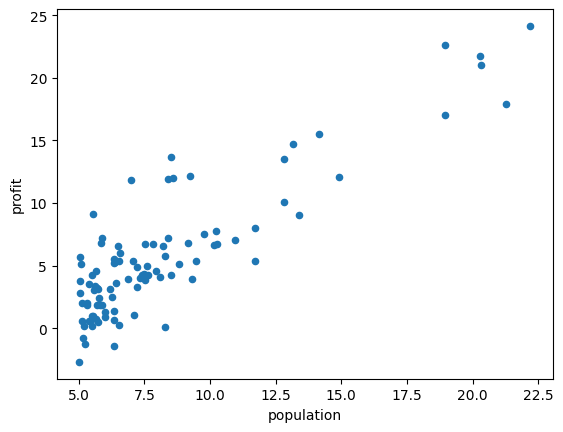

In [3]:
# Load data and plot it
data = pandas.read_csv('data.csv')
data.plot(kind='scatter', x='population', y='profit')
plot.show()

# Shuffle the data, extract x and y (features and labels)
data = shuffle(data)
x = data['population'].to_numpy().reshape((-1,1))
y = data['profit'].to_numpy().reshape((-1,1))

# (manual splitting, or we can use train_test_split instead)
x_train = x[0:80]
y_train = y[0:80]
x_test = x[80:]
y_test = y[80:]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Optimized theta: [-3.48558343  1.12327599]
Mean Squared Error (Custom): 4.1064794140582626


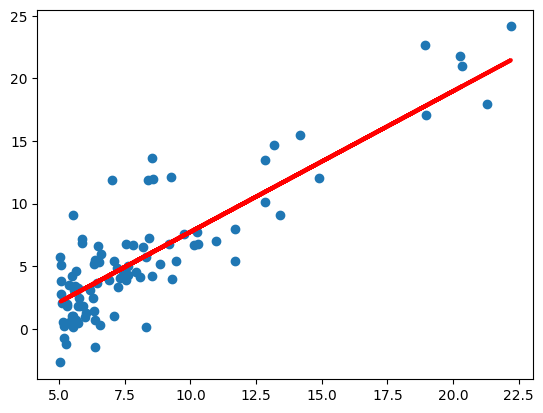

In [9]:
def mean_squared_error(y_true, y_pred):
    """
    Computes the mean squared error between true and predicted values.
    
    Parameters:
    y_true (numpy.ndarray): Actual target values (can be shape (m,) or (m,1))
    y_pred (numpy.ndarray): Predicted values (can be shape (m,) or (m,1))
    
    Returns:
    float: Mean squared error (using 1/(2m) factor to match original implementation)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    m = y_true.shape[0]
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)


def predict(X, theta):
    """
    Predicts output values using the linear regression model.
    
    Parameters:
    X (numpy.ndarray): Input features (m x n), where m is number of samples, n is number of features
    theta (numpy.ndarray): Model parameters [theta_0, theta_1, ...]
    
    Returns:
    numpy.ndarray: Predicted values (shape (m,))
    """
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    m = X.shape[0]
    X_with_bias = np.c_[np.ones(m), X]  # Shape: (m, n+1)
    return np.dot(X_with_bias, theta)  # Shape: (m,)


def fit_GD_vectorized(X, y, alpha=0.01, max_iterations=1000):
    """
    Vectorized gradient descent. Ensures y is 1D so gradients have correct shape.
    """
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    y = np.asarray(y).flatten()  # make sure y is shape (m,)
    m, n = X.shape
    X_with_bias = np.c_[np.ones(m), X]
    theta = np.zeros(n + 1)
    for i in range(max_iterations):
        h = np.dot(X_with_bias, theta)          # shape (m,)
        gradients = (1 / m) * np.dot(X_with_bias.T, (h - y))  # shape (n+1,)
        theta = theta - alpha * gradients
    return theta


# Example usage of custom functions

alpha = 0.01  # Learning rate (already defined in notebook but safe to keep same name)
num_iters = 1000  # Number of iterations
optimized_theta = fit_GD_vectorized(x_train, y_train, alpha, num_iters)
print("Optimized theta:", optimized_theta)
y_pred_custom = predict(x_test, optimized_theta)
mse_custom = mean_squared_error(y_test, y_pred_custom)
print("Mean Squared Error (Custom):", mse_custom)

# draw plot with custom model (flatten arrays for plotting)
plot.scatter(x.flatten(), y.flatten())
plot.plot(x_test.flatten(), y_pred_custom, color='red', linewidth=3)
plot.show()
